In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the required libraries
We'll start with importing required libraries

In [61]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Reading pickle files 

Let's read pickle files for creating training/validation and test datasets

In [62]:
pickle_file_link = "/content/drive/MyDrive/Introduction to Deep Learning/4- Final_Project/UrbanSound8K/Pickles"
X_train = pickle.load(open(f"{pickle_file_link}/X_train.pickle", "rb"))
y_train = pickle.load(open(f"{pickle_file_link}/y_train.pickle", "rb"))

X_val = pickle.load(open(f"{pickle_file_link}/X_val.pickle", "rb"))
y_val = pickle.load(open(f"{pickle_file_link}/y_val.pickle", "rb"))

X_test = pickle.load(open(f"{pickle_file_link}/X_test.pickle", "rb"))
y_test = pickle.load(open(f"{pickle_file_link}/y_test.pickle", "rb"))

## Let's check the number of samples in each dataset to see the final results.

In [63]:
# Print the number of samples 
print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")
print(f"X_val: {len(X_val)}")
print(f"y_val: {len(y_val)}")
print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 6986
y_train: 6986
X_val: 873
y_val: 873
X_test: 873
y_test: 873


## Constructing the neural network
 
Now we can create our model. First, we start by creating a model object using the Sequential API of Keras.

📌 Use tf.keras.Sequential() to create a model object

In [64]:
# Create a model object
model = tf.keras.Sequential()

### Feature extraction layers

For the first two layers, we add a convolution and max pooling layer.

📌 Use tf.keras.layers.Conv2D() and tf.keras.layers.MaxPooling2D() to create the layers.

📌 Use .add() method of the object to add the layer.

In [65]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding =  "same",
                                 activation = "relu",
                                 input_shape =(128,128,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

Then, we add more layers. One convolution, one max pooling, and one convolution layer again.

📌 Use tf.keras.layers.Conv2D() and tf.keras.layers.MaxPooling2D() to create the layers.

📌 Use .add() method of the object to add the layer.

In [66]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding =  "same",
                                 activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding =  "same",
                                 activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

### Flatten

To connect the 2D convolution and 1D dense layers, we have to "flatten" the convolution layer.

📌 Use tf.keras.layers.Flatten() to flatten the layers.

📌 Use .add() method of the object to add the layer.

In [67]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

### Classification layers

Now that we have the features extracted, we can move on to the classification part. We add two dense layers each with 64 nodes, 0.5 dropout and ReLU activation functions.

📌 Use tf.keras.layers.Dense() to create the layers.

📌 Use .add() method of the object to add the layer.

In [68]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

### Output layer

As the last part of our neural network, we add the output layer. The number of nodes will be equal to the number of target classes which is 10 in our case. We'll use the softmax activation function in the output layer.

📌 Use tf.keras.layers.Dense() to create the layer.

📌 Use .add() method of the object to add the layer.

In [69]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

### Optimizer

Now we have the structure of our model. To configure the model for training, we'll use the .compile() method. Inside the compile method, we have to define the following:
*   "Adam" for optimizer
*   "Sparse Categorical Crossentropy" for the loss function


📌 Construct the model with the .compile() method.

In [70]:
# Compile the model
model.compile(optimizer =  "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [71]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train,y_train, 
                    batch_size = 128,
                    epochs = 50,
                    validation_data = (X_val, y_val))

Epoch 1/50
55/55 [==============================] - 6s 99ms/step - loss: 2.2599 - accuracy: 0.1401 - val_loss: 2.1033 - val_accuracy: 0.3024
Epoch 2/50
55/55 [==============================] - 5s 93ms/step - loss: 2.0235 - accuracy: 0.2442 - val_loss: 1.6506 - val_accuracy: 0.4410
Epoch 3/50
55/55 [==============================] - 5s 92ms/step - loss: 1.8136 - accuracy: 0.3245 - val_loss: 1.4302 - val_accuracy: 0.5452
Epoch 4/50
55/55 [==============================] - 5s 93ms/step - loss: 1.6538 - accuracy: 0.3938 - val_loss: 1.2536 - val_accuracy: 0.5613
Epoch 5/50
55/55 [==============================] - 5s 93ms/step - loss: 1.5391 - accuracy: 0.4270 - val_loss: 1.1559 - val_accuracy: 0.6220
Epoch 6/50
55/55 [==============================] - 5s 93ms/step - loss: 1.4602 - accuracy: 0.4585 - val_loss: 1.0846 - val_accuracy: 0.6208
Epoch 7/50
55/55 [==============================] - 5s 92ms/step - loss: 1.3788 - accuracy: 0.4874 - val_loss: 1.0924 - val_accuracy: 0.6197
Epoch 8/50
55

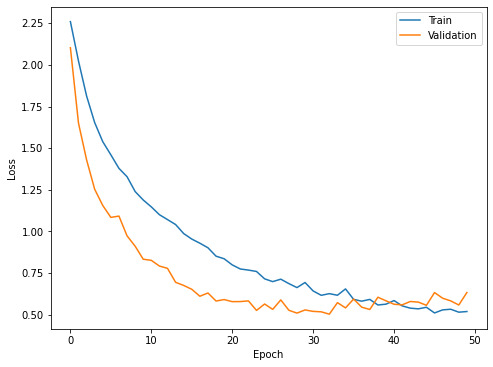

In [72]:
# Plot the the training loss
plt.plot(results.history["loss"],label ="Train")

# Plot the the validation loss
plt.plot(results.history["val_loss"],label ="Validation")

# Name the x and y axises
plt.ylabel("Loss")
plt.xlabel("Epoch")

# Put legend table
plt.legend()

# Show the plot
plt.show()


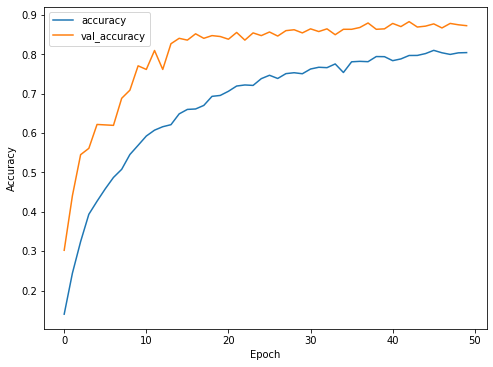

In [73]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"],label ="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"],label ="val_accuracy")

# Name the x and y axises
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

# Put legend table
plt.legend()

# Show the plot
plt.show()

## Performance evaluation

Let's use the test dataset we created to evaluate the performance of the model.




In [74]:
# Evaluate the performance
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 14ms/step - loss: 0.7114 - accuracy: 0.8488


[0.7114077210426331, 0.8487972617149353]

### Try a prediction
 We take the sample of test set 


In [75]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[633].reshape(1,128,128,1))

# Print the prediction result
print(prediction_result)

[[1.8814845e-02 5.4874261e-05 4.5882430e-02 7.0982742e-06 1.2209005e-05
  1.9759308e-09 5.4297709e-15 2.2220448e-12 1.2354359e-07 9.3522841e-01]]


Finally, we find the predicted class and prediction probability and print the results.

📌 argmax() to find the class.

📌 max() to find the probability.

In [76]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [77]:
# Print the results
print(f"This sound spectogram belongs to class {predicted_class} with {predicted_probability} probability")

This sound spectogram belongs to class 9 with 0.9352284073829651 probability


### Try a prediction based on audio data
 We will try to make a prediction based on sound data. To do this, we will preprocess sample sound data to add our model

In [78]:
#importing required libraries
import os
import random 
from pathlib import Path
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf
from sklearn.preprocessing import minmax_scale

In [79]:
#Testing sample path
sound_sample = '/content/drive/MyDrive/Introduction to Deep Learning/4- Final_Project/UrbanSound8K/audio/fold10/2937-1-0-0.wav'

In [80]:
#testing audio
ipd.Audio(sound_sample)

In [81]:
#create spectogram function
test_sound_path = "/content/drive/MyDrive/Introduction to Deep Learning/4- Final_Project"
import librosa
import librosa.display
def create_spectogram(filepath):
  global saving_path
  plt.rcParams["figure.figsize"] = [6.96, 5.2]
  plt.rcParams["figure.autolayout"] = True
  fig, ax = plt.subplots()
  y, sr = librosa.load(filepath) 
  S = librosa.feature.melspectrogram(y=y)
  S_dB = librosa.power_to_db(S, ref=np.max)
  img = librosa.display.specshow(S_dB, sr=sr,  hop_length=256)
  fig.tight_layout()
  saving_path = f"{test_sound_path}/{Path(filepath).stem}.png"
  plt.savefig(saving_path)


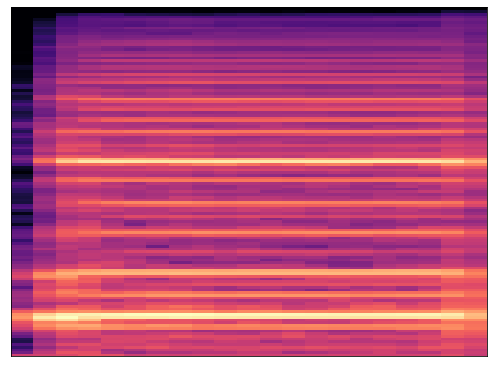

In [82]:
create_spectogram(sound_sample)

In [83]:
spectogram = cv.imread(saving_path, cv.IMREAD_COLOR)
spectogram = spectogram[10:360,14:491]
spectogram = cv.cvtColor(spectogram,cv.COLOR_BGR2GRAY)
spectogram = cv.resize(spectogram, (128,128))
spectogram =  minmax_scale(spectogram)
spectogram

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.055     , 0.055     ,
        0.055     ],
       [0.        , 0.        , 0.        , ..., 0.21      , 0.21      ,
        0.21      ],
       ...,
       [0.29943503, 0.29943503, 0.29943503, ..., 0.535     , 0.535     ,
        0.535     ],
       [0.37853107, 0.37853107, 0.37853107, ..., 0.55      , 0.55      ,
        0.55      ],
       [0.63276836, 0.63276836, 0.63276836, ..., 0.535     , 0.535     ,
        0.535     ]])

In [84]:
# Make prediction on the reshaped sample
prediction_result = model.predict(spectogram.reshape(1,128,128,1))

# Print the prediction result
print(prediction_result)

[[1.9206220e-13 9.2188221e-01 6.7914283e-05 1.0471572e-18 4.6010191e-09
  1.1168341e-33 0.0000000e+00 1.2079986e-28 3.0774784e-22 7.8049950e-02]]


In [85]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [86]:
# Print the results
print(f"This sound spectogram belongs to class {predicted_class} with {predicted_probability} probability")

This sound spectogram belongs to class 1 with 0.9218822121620178 probability
